In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
df = pd.read_csv('/kaggle/input/ultima/ultima_all_clean.txt', header = 0)
df

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
import numpy as np

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv')
df = df.set_index('hn')
df.head()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
df.shape #เช็คขนาด

(1723, 23)

In [9]:
df.isnull().sum(axis=0) #อันไหนมีค่า null

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
appearance    101
stage          24
pchemo          1
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

In [10]:
df_clean_column = df.drop(['appearance','Wardsize','RHlvsi','depth','nodeyiel','vgmargin','pelvicme','adnmet'],axis = 1)#ตัดที่มีเยอะ
df_clean_column.isnull().sum(axis=0)#เหลือ null

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
stage          24
pchemo          1
finalhisto     10
size          114
utmet          98
vgmet          97
pmmet          94
dtype: int64

In [11]:
df_clean = df_clean_column.dropna(axis = 0)#ท่าตัวในมี ค่าnull ตัดทิ้งทั้งหมด

In [8]:
df_clean.shape #หลังจากตัดไปเหลือเท่าไหร่

(1555, 15)

In [12]:
#อยากทำนาย pmmt
pel_class = np.unique(df_clean['pmmet'])
pel_class

array([0., 1.])

In [44]:
pel_class = np.unique(df_clean['vgmet'])
pel_class

array([0., 1., 2.])

In [46]:
pel_value = [sum(df_clean['pmmet']==pel_class[0]),
             sum(df_clean['pmmet']==pel_class[1])]
pel_value

[1278, 277]

In [48]:
pel_value2 = [sum(df_clean['vgmet']==pel_class[0]),
             sum(df_clean['vgmet']==pel_class[1]),
             sum(df_clean['vgmet']==pel_class[2])]
pel_value2

[1219, 221, 115]

# แบ่งXY

In [14]:
#แบ่งXY xคือ ทดสอบ yคือคำตอบ** 
y = df_clean['pmmet'].values #label คำตอบ
X = df_clean.drop(['pmmet'],axis = 1).values # future ที่เหลือจากdrop data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0 )

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))#ช่วง 0-1 max1 min0
scaler.fit(X_train) #เอา scaler เก็บ X_train_norm , X_test_norm
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# สร้างmodel

# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression #เลือก model
from sklearn.model_selection import GridSearchCV #หาพารามิเตอร์ ที่ดีที่สุด

params = {'C': [1, 2, 4, 8, 16, 32]} #จูนค่า
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)#วิธีในการหา
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))#print best_params_
print("10CV accuracy : "+str(clf.best_score_*100))#print best_score_

Best params : {'C': 1}
10CV accuracy : 83.36193548387098


In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm) #ทำนาย
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 84.56591639871382


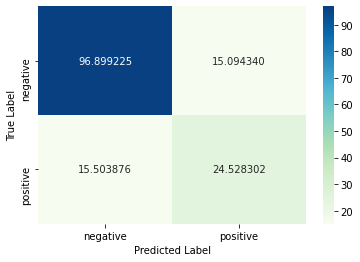

In [80]:
#วิเคราะห์กลุ่ม
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

target_names = ['negative', 'positive']# [0 , 1]
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [81]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.86      0.97      0.91       258
    positive       0.62      0.25      0.35        53

    accuracy                           0.85       311
   macro avg       0.74      0.61      0.63       311
weighted avg       0.82      0.85      0.82       311



# Home work

* from sklearn.svm import SVC
* from sklearn.svm import LinearSVC
* from sklearn.ensemble import RandomForestClassifier
* from sklearn.ensemble import ExtraTreesClassifier
* from xgboost import XGBClassifier
* from sklearn.neural_network import MLPClassifier
* from sklearn.naive_bayes import GaussianNB
* from sklearn.neighbors import KNeighborsClassifier
* from sklearn.tree import DecisionTreeClassifier
* from sklearn.linear_model import LogisticRegression


In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [1, 2, 4, 8, 16, 32], 
    'gamma' : [0.03125, 0.0625, 0.125, 0.25, 0.5, 0, 5, 25, 125, 625, 3125] 
}
clf = GridSearchCV(SVC(),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+ str(clf.best_score_*100))

Best params : {'C': 8, 'gamma': 0.5}
10CV accuracy : 84.2458064516129


In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

0.8167202572347267

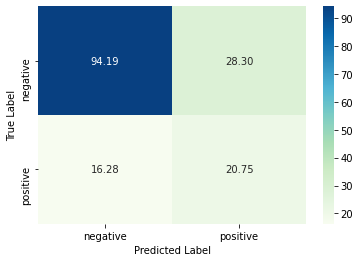

In [90]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")         
plt.show()

In [91]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.85      0.94      0.90       258
    positive       0.42      0.21      0.28        53

    accuracy                           0.82       311
   macro avg       0.64      0.57      0.59       311
weighted avg       0.78      0.82      0.79       311

